# Web Search 2018 - Lab 2 - 24/09/2018

The goal of this lab is to develop an architecture to search Text and Images, on different vector spaces.

We provide you with an example of how you can represent an image using the Histogram of Oriented Gradients image descriptor. Since one image is represented as a vector, you can represent multiple images as a matrix. Starting from this example, you can add other descriptors such as (HoC and GIST).

### In summary, you should implement the following functionality:

* Individual feature vectors **normalization**;
* Extend the provided code to extract features from images of the project dataset, and **store them as a matrix**;
* Add support for **additional features**, apart from HoG: (HoC and GIST for now);
* **Bag of Words** representation for words. Store texts as a sparse matrix;
* Implement a straighforward search function for individual search spaces: Given an image/text as input, retrieve the **top-k nearest documents**, using an **adequate distance function**.


We strongly encourage you to use the [scikit-learn](http://scikit-learn.org/stable/) library. Most of the functionalities that you will need for you project are already implemented there.

In [114]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.transform import resize

from keras.preprocessing import image

# Hide all warnings
import warnings
warnings.filterwarnings('ignore')

# Load and Visualize a sample Image

In [192]:
def center_crop_image(im, size=224):

    if im.shape[2] == 4: # Remove the alpha channel
        im = im[:, :, 0:3]

    # Resize so smallest dim = 224, preserving aspect ratio
    h, w, _ = im.shape
    if h < w:
        im = resize(image=im, output_shape=(224, int(w * 224 / h)))
    else:
        im = resize(im, (int(h * 224 / w), 224))

    # Center crop to 224x224
    h, w, _ = im.shape
    im = im[h // 2 - 112:h // 2 + 112, w // 2 - 112:w // 2 + 112]
    
    return im

We start by loading an image. Then we do some pre-processing to prepare the image for feature extraction.

Our goal is to represent images using a fixed-length vector, despite the original image height and width. Therefore, we resize all images to a certain height and width.

In [193]:
image1="cars.jpg"
image2="lena.jpg"
image3="street.jpg"
image4="bird.jpg"
image5="cup.jpg"

img = imread(image5)
print("Original shape: {}".format(img.shape))

Original shape: (1068, 1600, 3)


In order to keep the image aspect ratio, we crop the image at the center, and resize it:

In [194]:
## Resize image
#rgb = resize(rgb, (224, 224))

## Resize image with center cropping (square)
img = center_crop_image(img, size=224)
print("Final shape: {}".format(img.shape))

Final shape: (224, 224, 3)


For some image features, we do not need color information. Thus, we can convert the image to grayscale:

In [195]:
img_gray = rgb2gray(img)

print("Grayscale final shape: {}".format(img_gray.shape))

Grayscale final shape: (224, 224)


Visualize both resized original and grayscale images:

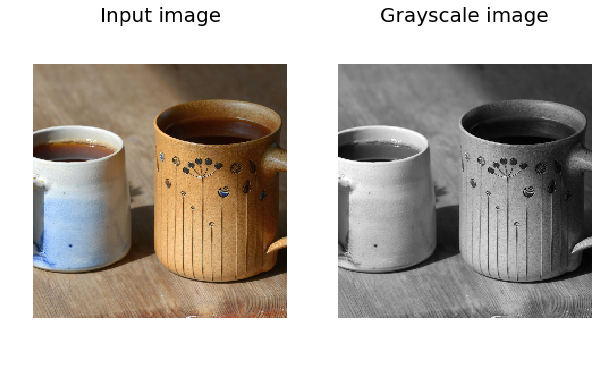

In [196]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img)
ax1.set_title('Input image', fontsize=20)
ax2.axis('off')
ax2.imshow(img_gray, cmap=plt.cm.gray)
ax2.set_title('Grayscale image', fontsize=20)
plt.show()

# Image feature vectors - Histogram of Oriented Gradients

#### Computing Histogram of Oriented Gradients (HoG) using skimage library. [HoG scikit-image Documentation](http://scikit-image.org/docs/0.14.x/api/skimage.feature.html#skimage.feature.hog)


In the HOG feature descriptor, the distribution ( histograms ) of directions of gradients ( oriented gradients ) are used as features. Gradients ( x and y derivatives ) of an image are useful as the magnitude of gradients is large around edges and corners ( regions of abrupt intensity changes ) and we know that edges and corners provide more information regarding object shapes than flat regions.


More about HoG descriptor: 
* http://mccormickml.com/2013/05/09/hog-person-detector-tutorial/
* http://mccormickml.com/2013/05/07/gradient-vectors/

In [197]:
fd, hog_image = hog(img_gray, orientations=8, pixels_per_cell=(16, 16), visualise=True)
print("HoG Feature vector shape: {}".format(fd.shape))

HoG Feature vector shape: (10368,)


Visualizing the computed HoG feature:

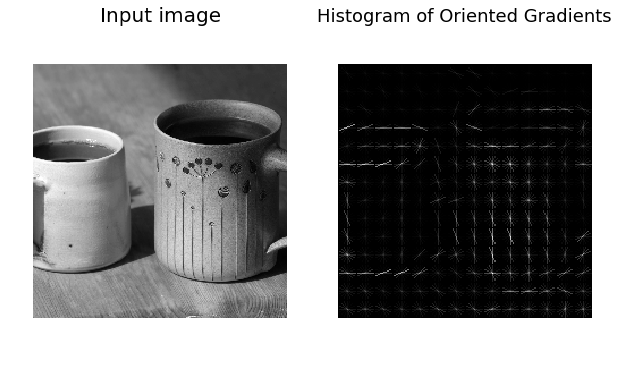

In [198]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img_gray, cmap=plt.cm.gray)
ax1.set_title('Input image', fontsize=20)

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients', fontsize=18)
plt.show()

### HoC and GIST Feature Vectors

In [144]:
# HoC
# Implemented in scikit-image

In [143]:
# GIST
# Original documentation: http://people.csail.mit.edu/torralba/code/spatialenvelope/
# 
# https://github.com/tuttieee/lear-gist-python